In [2]:
import numpy as np
import pandas as pd

## SP分析

In [3]:
df = pd.read_excel('SP_result.xlsx')
df.head()

,"(I,J,L)",sd,y,z,obj,time_cost
0,"(6, 3, 3)",0,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1277.575,0.1019
1,"(6, 3, 3)",1,"[1.0, 0.0, 1.0]","[[1.0, -0.0, 0.0], [-0.0, 0.0, -0.0], [0.0, 1....",1124.509,0.1041
2,"(6, 3, 3)",2,"[-0.0, -0.0, 1.0]","[[-0.0, -0.0, -0.0], [-0.0, -0.0, -0.0], [1.0,...",1013.134,0.0816
3,"(6, 3, 3)",3,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1138.921,0.0882
4,"(6, 3, 3)",4,"[-0.0, -0.0, 1.0]","[[-0.0, -0.0, -0.0], [-0.0, -0.0, -0.0], [1.0,...",1116.657,0.1023


In [4]:
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 = df['obj'] - cost1
df['open_num'] = open_num
df['drone_num'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2

In [5]:
df

,"(I,J,L)",sd,y,z,obj,time_cost,open_num,drone_num,cost1,cost2
0,"(6, 3, 3)",0,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1277.575,0.1019,2.0,3.0,600.0,677.575
1,"(6, 3, 3)",1,"[1.0, 0.0, 1.0]","[[1.0, -0.0, 0.0], [-0.0, 0.0, -0.0], [0.0, 1....",1124.509,0.1041,2.0,3.0,600.0,524.509
2,"(6, 3, 3)",2,"[-0.0, -0.0, 1.0]","[[-0.0, -0.0, -0.0], [-0.0, -0.0, -0.0], [1.0,...",1013.134,0.0816,1.0,3.0,300.0,713.134
3,"(6, 3, 3)",3,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1138.921,0.0882,2.0,3.0,600.0,538.921
4,"(6, 3, 3)",4,"[-0.0, -0.0, 1.0]","[[-0.0, -0.0, -0.0], [-0.0, -0.0, -0.0], [1.0,...",1116.657,0.1023,1.0,3.0,300.0,816.657
5,"(9, 4, 4)",0,"[0.0, 1.0, 1.0, -0.0]","[[0.0, 0.0, 0.0, -0.0], [1.0, -0.0, 1.0, -0.0]...",1803.477,0.2279,2.0,4.0,600.0,1203.477
6,"(9, 4, 4)",1,"[0.0, 1.0, 1.0, 0.0]","[[0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0], [...",1563.955,0.2582,2.0,4.0,600.0,963.955
7,"(9, 4, 4)",2,"[-0.0, 1.0, 1.0, 0.0]","[[-0.0, -0.0, -0.0, -0.0], [1.0, 1.0, -0.0, -0...",1470.724,0.2613,2.0,4.0,600.0,870.724
8,"(9, 4, 4)",3,"[0.0, 1.0, 1.0, 0.0]","[[0.0, 0.0, 0.0, -0.0], [1.0, -0.0, 0.0, 1.0],...",1595.164,0.2492,2.0,4.0,600.0,995.164
9,"(9, 4, 4)",4,"[-0.0, 1.0, 1.0, 0.0]","[[-0.0, -0.0, -0.0, -0.0], [-0.0, -0.0, 1.0, 1...",1601.651,0.5440,2.0,4.0,600.0,1001.651


In [6]:
quantile95 = df.groupby('(I,J,L)')['obj'].quantile(0.95)
quantile95

(I,J,L)
(12, 5, 5)    1997.8722
(15, 6, 6)    2233.3660
(6, 3, 3)     1249.8442
(9, 4, 4)     1763.1118
Name: obj, dtype: float64

In [7]:
averages = df.groupby('(I,J,L)')[['time_cost','open_num','drone_num','cost1', 'cost2', 'obj' ]].mean()
averages

,time_cost,open_num,drone_num,cost1,cost2,obj
"(I,J,L)",,,,,,
"(12, 5, 5)",0.61894,2.6,4.8,780.0,980.1060,1760.1060
"(15, 6, 6)",2.01128,3.0,6.0,900.0,1160.0744,2060.0744
"(6, 3, 3)",0.09562,1.6,3.0,480.0,654.1592,1134.1592
"(9, 4, 4)",0.30812,2.0,4.0,600.0,1006.9942,1606.9942


In [8]:
result = averages
result['95th'] = quantile95
result.reset_index(inplace=True)
result = result.sort_values(by='obj')

In [9]:
result

,"(I,J,L)",time_cost,open_num,drone_num,cost1,cost2,obj,95th
2,"(6, 3, 3)",0.09562,1.6,3.0,480.0,654.1592,1134.1592,1249.8442
3,"(9, 4, 4)",0.30812,2.0,4.0,600.0,1006.9942,1606.9942,1763.1118
0,"(12, 5, 5)",0.61894,2.6,4.8,780.0,980.1060,1760.1060,1997.8722
1,"(15, 6, 6)",2.01128,3.0,6.0,900.0,1160.0744,2060.0744,2233.3660


In [10]:
result.to_csv('数据分析结果/SP_result.csv', index=False)

## SP_test 分析

In [49]:
df = pd.read_excel('SP_test_result.xlsx')
df.head()

,"(I,J,L)",sd,Delta,y,z,obj
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],965.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],938.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],1071.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],941.43
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],954.099


In [50]:
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
df

,"(I,J,L)",sd,Delta,y,z,obj
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",965.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",938.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",1071.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",941.43
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",954.099
...,...,...,...,...,...,...
14395,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[[1, 0, 0, 1, 0, 0,], [0, 0, 0, 0, 0, 0,], [0,...",2535.526
14396,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[[1, 0, 0, 1, 0, 0,], [0, 0, 0, 0, 0, 0,], [0,...",2713.366
14397,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[[1, 0, 0, 1, 0, 0,], [0, 0, 0, 0, 0, 0,], [0,...",2521.571
14398,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[[1, 0, 0, 1, 0, 0,], [0, 0, 0, 0, 0, 0,], [0,...",2640.49


In [51]:
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
cost2 =df['obj'] - cost1
df['open_num'] = open_num
df['drone_num'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
df1 = df
df1

,"(I,J,L)",sd,Delta,y,z,obj,open_num,drone_num,cost1,cost2
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",965.714,2.0,3,600.0,365.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",938.671,2.0,3,600.0,338.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",1071.618,2.0,3,600.0,471.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",941.430,2.0,3,600.0,341.430
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",954.099,2.0,3,600.0,354.099
...,...,...,...,...,...,...,...,...,...,...
14395,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[[1, 0, 0, 1, 0, 0,], [0, 0, 0, 0, 0, 0,], [0,...",2535.526,3.0,6,900.0,1635.526
14396,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[[1, 0, 0, 1, 0, 0,], [0, 0, 0, 0, 0, 0,], [0,...",2713.366,3.0,6,900.0,1813.366
14397,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[[1, 0, 0, 1, 0, 0,], [0, 0, 0, 0, 0, 0,], [0,...",2521.571,3.0,6,900.0,1621.571
14398,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]","[[1, 0, 0, 1, 0, 0,], [0, 0, 0, 0, 0, 0,], [0,...",2640.490,3.0,6,900.0,1740.490


In [52]:
quantile95 = df1.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.95)

In [53]:
averages = df1.groupby(['(I,J,L)', 'Delta'])[['open_num','drone_num','cost1', 'cost2', 'obj']].mean()
averages['95th'] = quantile95

In [55]:
df_reset = averages.reset_index()
df_reset['Delta_sign'] = df_reset['Delta'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df_reset

,"(I,J,L)",Delta,open_num,drone_num,cost1,cost2,obj,95th,Delta_sign
0,"(12, 5, 5)",-0.20,2.6,4.8,780.0,833.734478,1613.734477,2060.04955,-1
1,"(12, 5, 5)",-0.15,2.6,4.8,780.0,877.621116,1657.621116,2121.86650,-1
2,"(12, 5, 5)",-0.10,2.6,4.8,780.0,920.234980,1700.234980,2144.23060,-1
3,"(12, 5, 5)",-0.05,2.6,4.8,780.0,961.474736,1741.474736,2155.20095,-1
4,"(12, 5, 5)",0.00,2.6,4.8,780.0,1004.290671,1784.290671,2209.65570,0
5,"(12, 5, 5)",0.05,2.6,4.8,780.0,1038.949222,1818.949222,2257.18330,1
6,"(12, 5, 5)",0.10,2.6,4.8,780.0,1079.342715,1859.342715,2296.10075,1
7,"(12, 5, 5)",0.15,2.6,4.8,780.0,1108.652978,1888.652978,2314.97760,1
8,"(12, 5, 5)",0.20,2.6,4.8,780.0,1139.546626,1919.546626,2321.19305,1
9,"(15, 6, 6)",-0.20,3.0,6.0,900.0,989.696695,1889.696695,2396.31785,-1


In [56]:
sp_1255 = df_reset[df_reset['(I,J,L)']== '(12, 5, 5)']['obj'].values

In [41]:
df = df_reset.groupby(['(I,J,L)', 'Delta_sign']).mean()
df.reset_index(inplace=True)
df.sort_values(by='obj', inplace=True)
df.drop(['Delta'],axis=1, inplace=True)
df.to_csv('数据分析结果/SP_test.csv', index=False)

## Wass-DRO 分析

In [102]:
df = pd.read_excel('Wass_result.xlsx')
df.head()

,"(I,J,L)",theta,sd,y,z,obj,time_cost
0,"(6, 3, 3)",0.5,0,"[1.0, 0.0, 1.0]","[[1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.0, ...",1307.128796,1.9909
1,"(6, 3, 3)",0.5,1,"[1.0, 0.0, 1.0]","[[1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.0, ...",1154.061861,1.7932
2,"(6, 3, 3)",0.5,2,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1090.767028,1.7750
3,"(6, 3, 3)",0.5,3,"[1.0, 0.0, 1.0]","[[1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.0, ...",1168.474258,1.8086
4,"(6, 3, 3)",0.5,4,"[1.0, 0.0, 1.0]","[[0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [1.0, 1.0, ...",1173.480314,1.7485


In [103]:
quantile95 = df.groupby(['(I,J,L)', 'theta'])['obj'].quantile(0.95)
len(quantile95)

20

In [104]:
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 =df['obj'] - cost1
df['open_num'] = open_num
df['drone_num'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
df1 = df.groupby(['(I,J,L)', 'theta'])[['time_cost','open_num','drone_num','cost1', 'cost2', 'obj']].mean()
df1['95th'] = quantile95
df1.reset_index(inplace=True)


In [105]:
df1

,"(I,J,L)",theta,time_cost,open_num,drone_num,cost1,cost2,obj,95th
0,"(12, 5, 5)",0.5,194.47126,4.0,5.0,1200.0,928.748530,2128.748530,2277.586852
1,"(12, 5, 5)",1.0,211.15092,4.0,5.0,1200.0,947.319340,2147.319340,2296.571795
2,"(12, 5, 5)",2.0,263.53896,4.0,5.0,1200.0,983.675296,2183.675296,2333.625897
3,"(12, 5, 5)",4.0,407.73444,4.0,5.0,1200.0,1054.988742,2254.988742,2405.654027
4,"(12, 5, 5)",8.0,626.68748,4.0,5.0,1200.0,1194.403696,2394.403696,2545.764664
5,"(15, 6, 6)",0.5,379.65792,4.0,6.0,1200.0,1140.073546,2340.073546,2517.185271
6,"(15, 6, 6)",1.0,463.60118,4.0,6.0,1200.0,1155.076618,2355.076618,2532.717071
7,"(15, 6, 6)",2.0,453.18152,4.0,6.0,1200.0,1184.369485,2384.369485,2562.501239
8,"(15, 6, 6)",4.0,652.27592,4.0,6.0,1200.0,1241.971755,2441.971755,2620.602731
9,"(15, 6, 6)",8.0,1082.38438,4.0,6.0,1200.0,1354.338965,2554.338965,2733.275241


In [106]:
df1.sort_values(by='open_num', inplace=True)
df1.to_csv('数据分析结果/Wass_result.csv', index=False)

## Wass-DRO-test 分析

In [74]:
df = pd.read_excel('Wass_test_result.xlsx')
df 

,"(I,J,L)",Delta,theta,sd,y,z,obj
0,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]",[[1. 0. 0.]\n [0. 0. 0.]\n [0. 1. 1.]],965.714
1,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]",[[1. 0. 0.]\n [0. 0. 0.]\n [0. 1. 1.]],938.671
2,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]",[[1. 0. 0.]\n [0. 0. 0.]\n [0. 1. 1.]],1071.618
3,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]",[[1. 0. 0.]\n [0. 0. 0.]\n [0. 1. 1.]],941.430
4,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]",[[1. 0. 0.]\n [0. 0. 0.]\n [0. 1. 1.]],954.099
...,...,...,...,...,...,...,...
71995,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]",[[-0. -0. -0. 1. -0. -0.]\n [-0. -0. -0. -0. ...,2816.580
71996,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]",[[-0. -0. -0. 1. -0. -0.]\n [-0. -0. -0. -0. ...,2906.278
71997,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]",[[-0. -0. -0. 1. -0. -0.]\n [-0. -0. -0. -0. ...,2821.364
71998,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]",[[-0. -0. -0. 1. -0. -0.]\n [-0. -0. -0. -0. ...,2891.870


In [75]:
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
df

,"(I,J,L)",Delta,theta,sd,y,z,obj
0,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",965.714
1,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",938.671
2,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",1071.618
3,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",941.430
4,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",954.099
...,...,...,...,...,...,...,...
71995,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]","[[-0, -0, -0, 1, -0, -0,], [-0, -0, -0, -0, -...",2816.580
71996,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]","[[-0, -0, -0, 1, -0, -0,], [-0, -0, -0, -0, -...",2906.278
71997,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]","[[-0, -0, -0, 1, -0, -0,], [-0, -0, -0, -0, -...",2821.364
71998,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]","[[-0, -0, -0, 1, -0, -0,], [-0, -0, -0, -0, -...",2891.870


In [76]:
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 =df['obj'] - cost1
df['open_num'] = open_num
df['drone_num'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
df

,"(I,J,L)",Delta,theta,sd,y,z,obj,open_num,drone_num,cost1,cost2
0,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",965.714,2.0,3,600.0,365.714
1,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",938.671,2.0,3,600.0,338.671
2,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",1071.618,2.0,3,600.0,471.618
3,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",941.430,2.0,3,600.0,341.430
4,"(6, 3, 3)",-0.2,0.5,5,"[1.0, 0.0, 1.0]","[[1, 0, 0,], [0, 0, 0,], [0, 1, 1,]]",954.099,2.0,3,600.0,354.099
...,...,...,...,...,...,...,...,...,...,...,...
71995,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]","[[-0, -0, -0, 1, -0, -0,], [-0, -0, -0, -0, -...",2816.580,4.0,6,1200.0,1616.580
71996,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]","[[-0, -0, -0, 1, -0, -0,], [-0, -0, -0, -0, -...",2906.278,4.0,6,1200.0,1706.278
71997,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]","[[-0, -0, -0, 1, -0, -0,], [-0, -0, -0, -0, -...",2821.364,4.0,6,1200.0,1621.364
71998,"(15, 6, 6)",0.2,8.0,9,"[1.0, -0.0, -0.0, 1.0, 1.0, 1.0]","[[-0, -0, -0, 1, -0, -0,], [-0, -0, -0, -0, -...",2891.870,4.0,6,1200.0,1691.870


In [77]:
quantile95 = df.groupby(['(I,J,L)', 'Delta', 'theta'])['obj'].quantile(0.95)

In [78]:
averages = df.groupby(['(I,J,L)', 'Delta', 'theta'])[[ 'open_num','drone_num','cost1', 'cost2', 'obj']].mean()
averages['95th'] = quantile95

In [79]:
df_reset = averages.reset_index()
df_reset['Delta_sign'] = df_reset['Delta'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df_reset

,"(I,J,L)",Delta,theta,open_num,drone_num,cost1,cost2,obj,95th,Delta_sign
0,"(12, 5, 5)",-0.2,0.5,4.0,5.0,1200.0,763.604578,1963.604578,2409.73395,-1
1,"(12, 5, 5)",-0.2,1.0,4.0,5.0,1200.0,763.604578,1963.604578,2409.73395,-1
2,"(12, 5, 5)",-0.2,2.0,4.0,5.0,1200.0,763.604578,1963.604578,2409.73395,-1
3,"(12, 5, 5)",-0.2,4.0,4.0,5.0,1200.0,763.604578,1963.604578,2409.73395,-1
4,"(12, 5, 5)",-0.2,8.0,4.0,5.0,1200.0,765.132627,1965.132627,2410.51475,-1
...,...,...,...,...,...,...,...,...,...,...
175,"(9, 4, 4)",0.2,0.5,3.0,4.0,900.0,1156.059638,2056.059638,2442.73475,1
176,"(9, 4, 4)",0.2,1.0,3.0,4.0,900.0,1156.059638,2056.059638,2442.73475,1
177,"(9, 4, 4)",0.2,2.0,3.0,4.0,900.0,1156.059638,2056.059638,2442.73475,1
178,"(9, 4, 4)",0.2,4.0,3.0,4.0,900.0,1156.059638,2056.059638,2442.73475,1


In [80]:
test = df_reset[(df_reset['(I,J,L)'] == '(12, 5, 5)') & (df_reset['theta'] == 2)]['obj']
wass_1255 = test

In [64]:
df = df_reset.groupby(['(I,J,L)', 'theta','Delta_sign']).mean()
df.reset_index(inplace=True)
df.sort_values(by='open_num', inplace=True)
df.drop(['Delta'], axis=1, inplace=True)
df.to_csv('数据分析结果/Wass_test.csv', index=False)

## MAD-DRO 分析

In [59]:
df = pd.read_excel('MAD_result.xlsx')
df.head()

,"(I,J,L)",event_num,sd,y,z,obj,time_cost
0,"(6, 3, 3)",2,0,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1432.487,0.6244
1,"(6, 3, 3)",4,1,"[1.0, 0.0, 1.0]","[[1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.0, ...",1280.270,0.9213
2,"(6, 3, 3)",4,2,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1209.322,0.9616
3,"(6, 3, 3)",2,3,"[1.0, 0.0, 1.0]","[[0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [1.0, 1.0, ...",1294.627,0.5374
4,"(6, 3, 3)",3,4,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1293.979,0.7597


In [60]:
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 = df['obj'] - cost1
df['open_num'] = open_num
df['drone_num'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
df

,"(I,J,L)",event_num,sd,y,z,obj,time_cost,open_num,drone_num,cost1,cost2
0,"(6, 3, 3)",2,0,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1432.487,0.6244,2.0,3.0,600.0,832.487
1,"(6, 3, 3)",4,1,"[1.0, 0.0, 1.0]","[[1.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 1.0, ...",1280.270,0.9213,2.0,3.0,600.0,680.270
2,"(6, 3, 3)",4,2,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1209.322,0.9616,2.0,3.0,600.0,609.322
3,"(6, 3, 3)",2,3,"[1.0, 0.0, 1.0]","[[0.0, 0.0, 1.0], [0.0, 0.0, 0.0], [1.0, 1.0, ...",1294.627,0.5374,2.0,3.0,600.0,694.627
4,"(6, 3, 3)",3,4,"[1.0, 0.0, 1.0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 0.0], [1.0, 0.0, ...",1293.979,0.7597,2.0,3.0,600.0,693.979
5,"(9, 4, 4)",2,0,"[1.0, 0.0, 1.0, 1.0]","[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...",2184.957,5.1155,3.0,4.0,900.0,1284.957
6,"(9, 4, 4)",4,1,"[1.0, 0.0, 1.0, 1.0]","[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...",1942.924,12.5246,3.0,4.0,900.0,1042.924
7,"(9, 4, 4)",4,2,"[1.0, 0.0, 1.0, 1.0]","[[-0.0, -0.0, 1.0, -0.0], [-0.0, -0.0, -0.0, -...",1840.444,11.1455,3.0,4.0,900.0,940.444
8,"(9, 4, 4)",2,3,"[1.0, -0.0, 1.0, 1.0]","[[1.0, -0.0, -0.0, -0.0], [-0.0, -0.0, -0.0, -...",1970.617,5.3268,3.0,4.0,900.0,1070.617
9,"(9, 4, 4)",3,4,"[1.0, 0.0, 1.0, 1.0]","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [...",1975.150,8.3813,3.0,4.0,900.0,1075.150


In [61]:
quantile95 = df.groupby('(I,J,L)')['obj'].quantile(0.95)
quantile95

(I,J,L)
(12, 5, 5)    2339.9176
(15, 6, 6)    2663.3980
(6, 3, 3)     1404.9150
(9, 4, 4)     2142.9956
Name: obj, dtype: float64

In [62]:
averages = df.groupby('(I,J,L)')[['time_cost','open_num','drone_num','cost1', 'cost2', 'obj' ]].mean()
averages

,time_cost,open_num,drone_num,cost1,cost2,obj
"(I,J,L)",,,,,,
"(12, 5, 5)",89.88318,4.0,5.0,1200.0,992.3618,2192.3618
"(15, 6, 6)",816.88736,4.0,6.0,1200.0,1273.3840,2473.3840
"(6, 3, 3)",0.76088,2.0,3.0,600.0,702.1370,1302.1370
"(9, 4, 4)",8.49874,3.0,4.0,900.0,1082.8184,1982.8184


In [63]:
result = averages
result['95th'] = quantile95
result.reset_index(inplace=True)
result = result.sort_values(by='obj')
result.to_csv('数据分析结果/MAD_result.csv', index=False)

## MAD-DRO-test 分析

In [65]:
df = pd.read_excel('MAD_test_result.xlsx')
df.head()

,"(I,J,L)",sd,Delta,y,z,obj
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],965.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],938.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],1071.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],941.430
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],954.099


In [66]:
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
df

,"(I,J,L)",sd,Delta,y,z,obj
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",965.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",938.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",1071.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",941.430
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",954.099
...,...,...,...,...,...,...
14395,"(15, 6, 6)",9,0.2,"[1.0, 1.0, -0.0, 1.0, 1.0, -0.0]","[[ 0, -0, 1, -0, -0, 0,], [-0, 1, -0, -0, -...",2819.975
14396,"(15, 6, 6)",9,0.2,"[1.0, 1.0, -0.0, 1.0, 1.0, -0.0]","[[ 0, -0, 1, -0, -0, 0,], [-0, 1, -0, -0, -...",2940.282
14397,"(15, 6, 6)",9,0.2,"[1.0, 1.0, -0.0, 1.0, 1.0, -0.0]","[[ 0, -0, 1, -0, -0, 0,], [-0, 1, -0, -0, -...",2824.363
14398,"(15, 6, 6)",9,0.2,"[1.0, 1.0, -0.0, 1.0, 1.0, -0.0]","[[ 0, -0, 1, -0, -0, 0,], [-0, 1, -0, -0, -...",2929.715


In [67]:
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 =df['obj'] - cost1
df['open_num'] = open_num
df['drone_num'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
df

,"(I,J,L)",sd,Delta,y,z,obj,open_num,drone_num,cost1,cost2
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",965.714,2.0,3,600.0,365.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",938.671,2.0,3,600.0,338.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",1071.618,2.0,3,600.0,471.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",941.430,2.0,3,600.0,341.430
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]","[[0, 1, 0,], [0, 0, 0,], [1, 0, 1,]]",954.099,2.0,3,600.0,354.099
...,...,...,...,...,...,...,...,...,...,...
14395,"(15, 6, 6)",9,0.2,"[1.0, 1.0, -0.0, 1.0, 1.0, -0.0]","[[ 0, -0, 1, -0, -0, 0,], [-0, 1, -0, -0, -...",2819.975,4.0,6,1200.0,1619.975
14396,"(15, 6, 6)",9,0.2,"[1.0, 1.0, -0.0, 1.0, 1.0, -0.0]","[[ 0, -0, 1, -0, -0, 0,], [-0, 1, -0, -0, -...",2940.282,4.0,6,1200.0,1740.282
14397,"(15, 6, 6)",9,0.2,"[1.0, 1.0, -0.0, 1.0, 1.0, -0.0]","[[ 0, -0, 1, -0, -0, 0,], [-0, 1, -0, -0, -...",2824.363,4.0,6,1200.0,1624.363
14398,"(15, 6, 6)",9,0.2,"[1.0, 1.0, -0.0, 1.0, 1.0, -0.0]","[[ 0, -0, 1, -0, -0, 0,], [-0, 1, -0, -0, -...",2929.715,4.0,6,1200.0,1729.715


In [68]:
quantile95 = df.groupby(['(I,J,L)', 'Delta'])['obj'].quantile(0.95)

In [69]:
averages = df.groupby(['(I,J,L)', 'Delta'])[['open_num','drone_num','cost1', 'cost2', 'obj']].mean()
averages['95th'] = quantile95

In [70]:
df_reset = averages.reset_index()
df_reset['Delta_sign'] = df_reset['Delta'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df_reset

,"(I,J,L)",Delta,open_num,drone_num,cost1,cost2,obj,95th,Delta_sign
0,"(12, 5, 5)",-0.20,4.0,5.0,1200.0,763.604578,1963.604578,2409.73395,-1
1,"(12, 5, 5)",-0.15,4.0,5.0,1200.0,806.874272,2006.874273,2394.90350,-1
2,"(12, 5, 5)",-0.10,4.0,5.0,1200.0,851.464465,2051.464465,2446.82420,-1
3,"(12, 5, 5)",-0.05,4.0,5.0,1200.0,894.107855,2094.107855,2479.61565,-1
4,"(12, 5, 5)",0.00,4.0,5.0,1200.0,936.642365,2136.642365,2535.60130,0
5,"(12, 5, 5)",0.05,4.0,5.0,1200.0,974.732468,2174.732467,2585.31210,1
6,"(12, 5, 5)",0.10,4.0,5.0,1200.0,1012.057388,2212.057388,2585.81345,1
7,"(12, 5, 5)",0.15,4.0,5.0,1200.0,1045.839782,2245.839782,2634.36360,1
8,"(12, 5, 5)",0.20,4.0,5.0,1200.0,1080.276210,2280.276210,2656.65240,1
9,"(15, 6, 6)",-0.20,4.0,6.0,1200.0,981.671175,2181.671175,2687.93075,-1


In [71]:
df = df_reset.groupby(['(I,J,L)', 'Delta_sign']).mean()
df.reset_index(inplace=True)
df.sort_values(by='obj', inplace=True)
df.drop(['Delta'],axis=1, inplace=True)
df.to_csv('数据分析结果/MAD_test.csv', index=False)

In [72]:
mad_1255 = df_reset[df_reset['(I,J,L)']== '(12, 5, 5)']['obj']

## 总分析

In [90]:
SP_delta = sp_1255/1760#-600
wass_delta = wass_1255/2210#-900
mad_delta = mad_1255/2192#-900

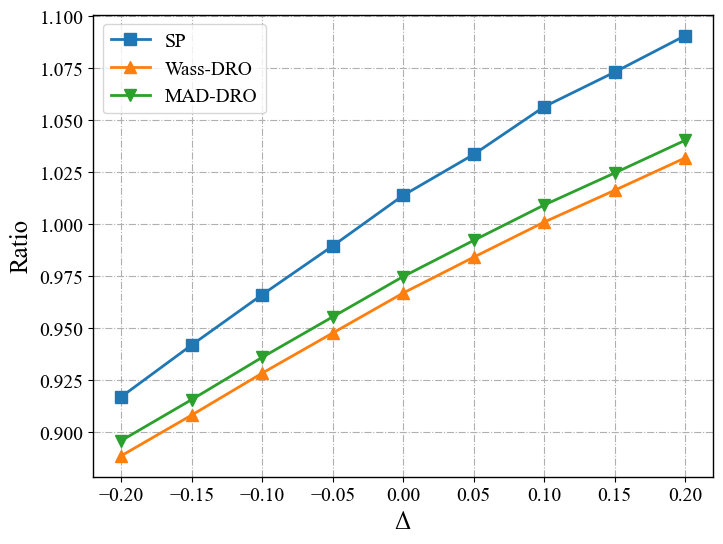

In [92]:
import matplotlib.pyplot as plt
import matplotlib

# 统一设置字体
plt.rcParams["font.family"] = 'Times New Roman'
 
# 分别设置mathtext公式的正体和斜体字体
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'  # 用于正常数学文本
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'  # 用于斜体数学文本
plt.rcParams.update({'font.size': 14})
x = np.arange(-0.2, 0.21, 0.05)
# 创建一个标准的图形窗口,并设置其尺寸
fig = plt.figure(figsize=(8, 6))
ax=plt.gca()
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
plt.grid(linestyle='-.')
plt.plot(x, SP_delta, marker = 's', markersize = 9, linewidth=2,  label='SP')
plt.plot(x, wass_delta, marker = '^', markersize = 9, linewidth=2,  label='Wass-DRO')
plt.plot(x, mad_delta, marker = 'v', markersize = 9, linewidth=2,  label='MAD-DRO')
plt.legend()
plt.xlabel(r'$\Delta$', fontsize=18)
plt.ylabel('Ratio', fontsize=18)

# 设置x、y轴刻度字体大小
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('../figures/ratio_mean_total.pdf', dpi=300)

plt.show()

In [132]:
df = pd.read_excel('SP_test_result.xlsx')
df.head()

,"(I,J,L)",sd,Delta,y,z,obj
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],965.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],938.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],1071.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],941.43
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],954.099


In [133]:
open_num = list(map(eval, df['y']))
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')

In [134]:
infisible_num = []
for delta in np.arange(-0.2, 0.21, 0.05):
    delta = round(delta, 2)
    a = df[(df['(I,J,L)'] == '(12, 5, 5)') & (df['Delta'] == delta)]['obj']
    infisible_num.append(a.isna().sum())

In [135]:
infisible_num

[0, 1, 3, 4, 4, 7, 5, 8, 11]

In [136]:
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
cost1 = list(map(lambda x: 300*x, open_num))
df['obj'] = pd.to_numeric(df['obj'], errors='coerce')
df.fillna(df['obj'].mean(), inplace=True) 
cost2 =df['obj'] - cost1
df['open_num'] = open_num
df['cost1'] = cost1
df['cost2'] = cost2
df1 = df
df1

,"(I,J,L)",sd,Delta,y,z,obj,open_num,cost1,cost2
0,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],965.714,2.0,600.0,365.714
1,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],938.671,2.0,600.0,338.671
2,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],1071.618,2.0,600.0,471.618
3,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],941.430,2.0,600.0,341.430
4,"(6, 3, 3)",5,-0.2,"[1.0, 0.0, 1.0]",[[0. 1. 0.]\n [0. 0. 0.]\n [1. 0. 1.]],954.099,2.0,600.0,354.099
...,...,...,...,...,...,...,...,...,...
14395,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]",[[1. 0. 0. 1. 0. 0.]\n [0. 0. 0. 0. 0. 0.]\n [...,2535.526,3.0,900.0,1635.526
14396,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]",[[1. 0. 0. 1. 0. 0.]\n [0. 0. 0. 0. 0. 0.]\n [...,2713.366,3.0,900.0,1813.366
14397,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]",[[1. 0. 0. 1. 0. 0.]\n [0. 0. 0. 0. 0. 0.]\n [...,2521.571,3.0,900.0,1621.571
14398,"(15, 6, 6)",9,0.2,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0]",[[1. 0. 0. 1. 0. 0.]\n [0. 0. 0. 0. 0. 0.]\n [...,2640.490,3.0,900.0,1740.490


In [137]:
averages = df1.groupby(['(I,J,L)', 'Delta'])[['open_num','cost1', 'cost2', 'obj']].mean()

In [141]:
df_reset = averages.reset_index()
sp_cost2 = df_reset[df_reset['(I,J,L)'] == '(12, 5, 5)']['cost2']
sp_obj = df_reset[df_reset['(I,J,L)'] == '(12, 5, 5)']['obj']

In [148]:
df = pd.read_excel('Wass_test_result.xlsx')
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 =df['obj'] - cost1
df['open_num'] = open_num
df['drone_num'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
averages = df.groupby(['(I,J,L)', 'Delta', 'theta'])[[ 'open_num','drone_num','cost1', 'cost2', 'obj']].mean()
df_reset = averages.reset_index()
a = df_reset[(df_reset['(I,J,L)'] == '(12, 5, 5)') & (df_reset['theta'] == 2)]
wass_cost2 = a['cost2']
wass_obj = a['obj']

In [149]:
df = pd.read_excel('MAD_test_result.xlsx')
df['z'] = df['z'].str.replace('\n', ',')
df['z'] = df['z'].str.replace('.', ',')
open_num = list(map(eval, df['y']))
open_num = list(map(sum, open_num))
drone_num = list(map(eval, df['z']))
drone_num = list(map(np.sum, drone_num))
cost1 = list(map(lambda x: 300*x, open_num))
cost2 =df['obj'] - cost1
df['open_num'] = open_num
df['drone_num'] = drone_num
df['cost1'] = cost1
df['cost2'] = cost2
averages = df.groupby(['(I,J,L)', 'Delta'])[['open_num','drone_num','cost1', 'cost2', 'obj']].mean()
df_reset = averages.reset_index()
mad_cost2 = df_reset[df_reset['(I,J,L)'] == '(12, 5, 5)']['cost2']
mad_obj = df_reset[df_reset['(I,J,L)'] == '(12, 5, 5)']['obj']

In [194]:
list1 = []
for i in [sp_cost2, sp_obj, wass_cost2, wass_obj, mad_cost2, mad_obj]:
    i = i.reset_index(drop=True)
    list1.append(i)

result_concat = pd.concat(list1, axis=1)
result_concat.to_csv('数据分析结果/outsample_delta_change.csv', index=False)

In [2]:
import cvxpy as cp
print("CVXPY version: ", cp.__version__)
print("Installed solvers: ", cp.installed_solvers())

CVXPY version:  1.5.2
Installed solvers:  ['CLARABEL', 'ECOS', 'ECOS_BB', 'GUROBI', 'OSQP', 'SCIPY', 'SCS']
